<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/CNN_model_on_mnist_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Loading data Set

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Checking the shape

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

Converting them into 0.0 to 1.0 from 0-255
we normaize them as model learn faster

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

Model built

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation= 'softmax')

])

Compiling the Model

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

training the Model

In [9]:
#training:
history = model.fit(x_train, y_train, epochs= 5, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9029 - loss: 0.3239 - val_accuracy: 0.9831 - val_loss: 0.0523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9873 - val_loss: 0.0380
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9899 - val_loss: 0.0310
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0174 - val_accuracy: 0.9908 - val_loss: 0.0255


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0326


Checking our model test accuracy

In [11]:
print(f'test accuracy is: {test_acc}')

test accuracy is: 0.9908000230789185


Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


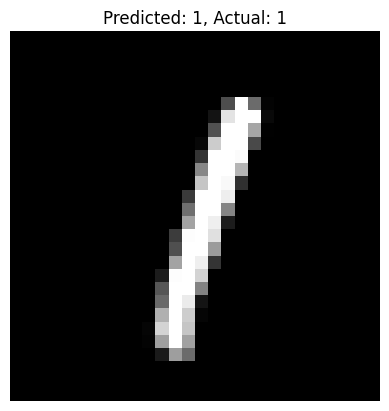

Predicted class for the image: 1
Actual class for the image: 1


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions on the test set
predictions = model.predict(x_test)

# Choose an image to display (fifth image)
image_index = 5

# Get the predicted class for the selected test image
predicted_class = np.argmax(predictions[image_index])

# Get the actual class for the selected test image
actual_class = y_test[image_index]

# Display the image
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()

print(f"Predicted class for the image: {predicted_class}")
print(f"Actual class for the image: {actual_class}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


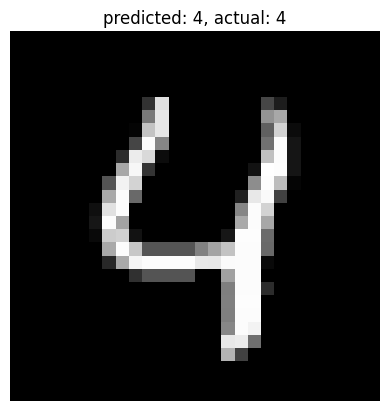

predicted: 4
actual: 4


In [13]:
import numpy as np

prediction = model.predict(x_test)

image_index = 4

prediction_class = np.argmax(prediction[image_index])
actual_class = y_test[image_index]

plt.imshow(x_test[image_index].reshape(28, 28), cmap= 'gray')
plt.title(f'predicted: {prediction_class}, actual: {actual_class}')
plt.axis('off')
plt.show()
print(f'predicted: {prediction_class}')
print(f'actual: {actual_class}')